In [2]:
# Importando as bibliotecas necessárias
import pandas as pd

# Carregando o dataset a partir da URL
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
df = pd.read_json(url)

# Verificando se os dados foram carregados corretamente
print("Dados carregados com sucesso!")
df.head()

Dados carregados com sucesso!


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Analisando os tipos de dados e valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
# Normalizando as colunas aninhadas (tipo JSON) para expandi-las em novas colunas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Juntando os novos dataframes ao dataframe original
df_final = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)

# Verificando o resultado da junção
df_final.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
# Removendo as colunas originais que foram normalizadas, pois agora são redundantes
df_final.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

# Verificando a remoção das colunas
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
# Verificando a estrutura final do DataFrame
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
# Corrigindo o Dtype da coluna 'Charges.Total'
# Converte para numérico, transforma erros em NaN e depois remove as linhas com NaN.
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final.dropna(inplace=True)

# Verificando o resultado da limpeza
print("Verificação final dos tipos e valores ausentes:")
df_final.info()

Verificação final dos tipos e valores ausentes:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16 

In [8]:
# Padronizando a coluna alvo 'Churn' para formato numérico (0 = No, 1 = Yes)
df_final['Churn'] = df_final['Churn'].replace({'Yes': 1, 'No': 0})

# Verificando a transformação da coluna
print("Coluna 'Churn' corrigida e padronizada:")
df_final[['customerID', 'Churn']].head()

Coluna 'Churn' corrigida e padronizada:


,customerID,Churn
0,0002-ORFBO,0
1,0003-MKNFE,0
2,0004-TLHLJ,1
3,0011-IGKFF,1
4,0013-EXCHZ,1


In [9]:
# Gerando um resumo estatístico das variáveis numéricas
df_final.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7256.0000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213
std,0.3693,24.558067,30.125739,2268.632997
min,0.0000,1.000000,18.250000,18.800000
25%,0.0000,9.000000,35.450000,400.225000
50%,0.0000,29.000000,70.300000,1391.000000
75%,0.0000,55.000000,89.900000,3785.300000
max,1.0000,72.000000,118.750000,8684.800000


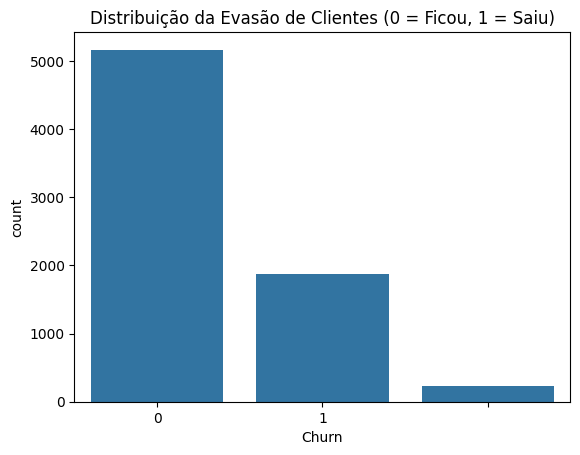

In [10]:
# Importando bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Criando o gráfico para visualizar a distribuição da variável alvo 'Churn'
sns.countplot(x='Churn', data=df_final)

# Adicionando título e exibindo o gráfico
plt.title('Distribuição da Evasão de Clientes (0 = Ficou, 1 = Saiu)')
plt.show()

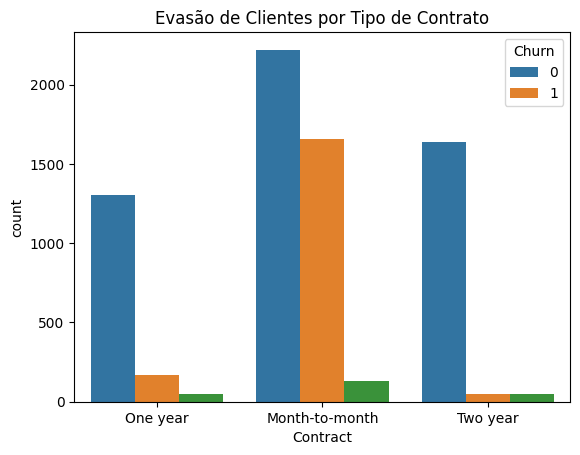

In [11]:
# Análise da evasão de clientes em relação ao tipo de contrato
sns.countplot(x='Contract', hue='Churn', data=df_final)

# Adicionando título e exibindo o gráfico
plt.title('Evasão de Clientes por Tipo de Contrato')
plt.show()

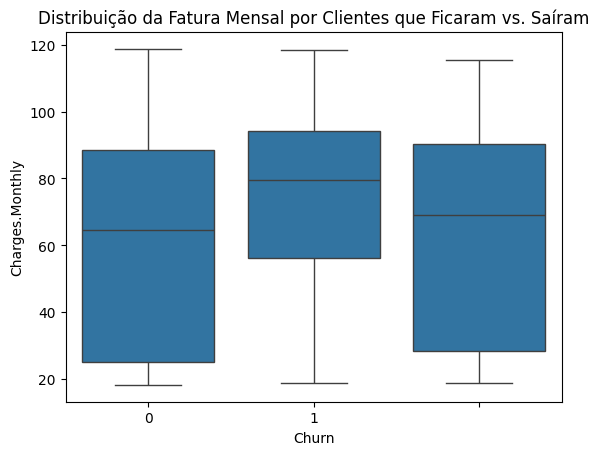

In [12]:
# Análise da evasão de clientes em relação à fatura mensal
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_final)

# Adicionando título e exibindo o gráfico
plt.title('Distribuição da Fatura Mensal por Clientes que Ficaram vs. Saíram')
plt.show()

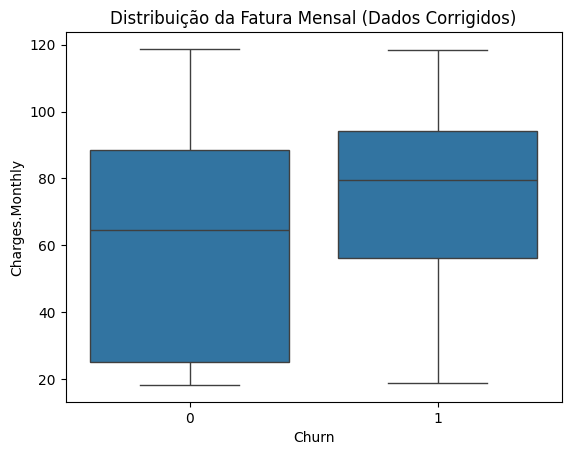

In [13]:
# Tratando valores anômalos em 'Churn' antes de recriar a visualização
df_final = df_final[df_final['Churn'] != '']

# Recriando o boxplot com os dados agora limpos
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_final)
plt.title('Distribuição da Fatura Mensal (Dados Corrigidos)')
plt.show()

# Relatório Final - Análise de Churn da Telecom X

## 1. Introdução
O objetivo deste projeto foi analisar os dados de clientes da empresa fictícia Telecom X para entender os principais fatores que levam à evasão de clientes (churn). Compreender esses motivos é o primeiro passo para criar estratégias eficazes de retenção e garantir a saúde financeira da empresa.

## 2. Limpeza e Preparação dos Dados
Os dados foram carregados a partir de um arquivo JSON. O primeiro passo foi normalizar os dados, desempacotando colunas aninhadas para que todas as informações ficassem visíveis. Em seguida, foi realizado um processo de limpeza, onde a coluna 'Charges.Total' foi convertida para formato numérico e as linhas com dados ausentes foram removidas. Por fim, a coluna alvo 'Churn' foi padronizada para valores numéricos (0 para 'Não' e 1 para 'Sim') para facilitar a análise.

## 3. Análise Exploratória e Insights
A análise exploratória revelou os seguintes padrões:

* **Taxa de Evasão Geral:** A empresa possui uma taxa de evasão de aproximadamente 27%.
* **Impacto do Contrato:** O fator mais influente no churn é o tipo de contrato. Clientes com **contrato mensal** apresentam uma taxa de cancelamento drasticamente maior em comparação com clientes de contratos anuais.
* **Impacto da Fatura Mensal:** Clientes que cancelam o serviço pagam, em média, uma **fatura mensal mais elevada** do que os clientes que permanecem na empresa.

## 4. Conclusões e Recomendações
**Conclusão:** O perfil de maior risco de evasão é o cliente com contrato do tipo mensal e que paga uma fatura mensal mais alta. A falta de um compromisso de longo prazo, combinada com um custo mais elevado, parece ser a principal motivadora para o cancelamento.

**Recomendações:**
1.  **Fidelização de Contratos:** Criar campanhas de marketing e oferecer descontos agressivos para que clientes de contrato mensal migrem para planos de 1 ou 2 anos.
2.  **Revisão de Planos:** Analisar a estrutura de valor dos planos mais caros. É preciso garantir que os benefícios oferecidos (velocidade da internet, canais de TV, etc.) justifiquem o preço mais alto na percepção do cliente.
3.  **Ações Preditivas:** Utilizar os insights desta análise para alimentar um modelo de Machine Learning que possa prever, com antecedência, quais clientes têm maior probabilidade de cancelar, permitindo ações de retenção proativas.

In [14]:
# Salvando o DataFrame final em um arquivo CSV para a Parte 2
df_final.to_csv('dados_tratados.csv', index=False)

print("\nArquivo 'dados_tratados.csv' salvo com sucesso!")


Arquivo 'dados_tratados.csv' salvo com sucesso!
